<a href="https://colab.research.google.com/github/SiriBatchu/CMPE-257/blob/main/Colabs/Fractual_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Load Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

# Extract the filename
filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(filename)

Saving HouseData_CA_Complete.csv to HouseData_CA_Complete.csv


In [6]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
                                        property_url property_id  listing_id  \
0  https://www.realtor.com/rentals/details/2244-E...  2682968763  2960971273   
1  https://www.realtor.com/rentals/details/760-S-...  9853849727  2960972897   
2  https://www.realtor.com/rentals/details/1720-A...  1326775915  2960921127   
3  https://www.realtor.com/rentals/details/1200-H...  1204248645  2960969226   
4  https://www.realtor.com/rentals/details/1421-D...  1049101110  2960976135   

    mls      mls_id    status  \
0  AVAL    60923844  FOR_RENT   
1  APTL   p73592387  FOR_RENT   
2  SDCA   230021188  FOR_RENT   
3  MRCA  NDP2308432  FOR_RENT   
4  AVAL    60920959  FOR_RENT   

                                                text          style  \
0  3 Month Minimum, also available for a 1 year m...         CONDOS   
1  Brand New Koreatown Apartment Now Leasing! In ...      APARTMENT   
2  Welcome to this Vacation Rental in Coronado Sh...         CONDOS   
3  Mont

In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26563 entries, 0 to 26562
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_url      26563 non-null  object
 1   property_id       26563 non-null  object
 2   listing_id        26563 non-null  object
 3   mls               26563 non-null  object
 4   mls_id            26563 non-null  object
 5   status            26563 non-null  object
 6   text              21606 non-null  object
 7   style             26563 non-null  object
 8   full_street_line  26431 non-null  object
 9   street            26411 non-null  object
 10  unit              6809 non-null   object
 11  city              26562 non-null  object
 12  state             26563 non-null  object
 13  zip_code          26557 non-null  object
 14  beds              16258 non-null  object
 15  full_baths        16082 non-null  object
 16  half_baths        3810 non-null   object
 1

In [8]:
numeric_cols = ['beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
                'list_price', 'sold_price', 'price_per_sqft', 'lot_sqft']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("\nFirst 5 Rows After Numeric Conversion:")
print(df[numeric_cols].head())



First 5 Rows After Numeric Conversion:
   beds  full_baths  half_baths    sqft  year_built  list_price  sold_price  \
0   2.0         2.0         NaN  1122.0         NaN      4500.0    485000.0   
1   NaN         NaN         NaN     NaN         NaN         NaN         NaN   
2   1.0         1.0         NaN   663.0      1973.0      4500.0    550000.0   
3   2.0         2.0         NaN  1660.0      1976.0      4500.0    807500.0   
4   3.0         2.0         1.0  2000.0         NaN      5000.0    880000.0   

   price_per_sqft  lot_sqft  
0             4.0       NaN  
1             NaN       NaN  
2             7.0       NaN  
3             3.0   43560.0  
4             3.0       NaN  


In [9]:
# Step 6: Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values per Column:
builder_name        26549
builder_id          26549
half_baths          22767
agent_nrds_id       21741
broker_id           20909
broker_name         20027
unit                19754
parking_garage      19171
hoa_fee             19014
office_id           18629
office_email        17419
lot_sqft            16551
list_price_max      16522
list_price_min      16481
agent_id            16293
stories             15142
agent_phones        14976
agent_email         14827
office_phones       14816
agent_name          14439
agent_mls_set       14439
office_mls_set      14364
office_name         14360
year_built          13519
sold_price          13081
last_sold_date      13068
estimated_value     12289
price_per_sqft      11426
sqft                11421
assessed_value      10812
full_baths          10495
beds                10319
list_price          10298
neighborhoods        5422
text                 4957
primary_photo        4263
alt_photos           4263
nearby_sch

In [10]:
# Fill numerical columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = ['status', 'style', 'city', 'state']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 6.2: Display After Handling Missing Values
print("\nMissing Values per Column After Handling:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values per Column After Handling:
builder_name        26549
builder_id          26549
agent_nrds_id       21741
broker_id           20909
broker_name         20027
unit                19754
parking_garage      19171
hoa_fee             19014
office_id           18629
office_email        17419
list_price_max      16522
list_price_min      16481
agent_id            16293
stories             15142
agent_phones        14976
agent_email         14827
office_phones       14816
agent_name          14439
agent_mls_set       14439
office_mls_set      14364
office_name         14360
last_sold_date      13068
estimated_value     12289
assessed_value      10812
neighborhoods        5422
text                 4957
alt_photos           4263
primary_photo        4263
nearby_schools        589
fips_code             585
latitude              582
longitude             582
street                152
full_street_line      132
county                  7
zip_code                6
property_url         

<ipython-input-10-e5858323337a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-10-e5858323337a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [11]:
# Step 7: Check for Duplicate Entries
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Entries: {duplicate_count}")

# Drop duplicates (if necessary)
df = df.drop_duplicates()


Number of Duplicate Entries: 3052


In [12]:
# Step 8: Summary Statistics
print("\nSummary Statistics for Numerical Features:")
print(df[numeric_cols].describe())



Summary Statistics for Numerical Features:
               beds    full_baths    half_baths          sqft    year_built  \
count  23511.000000  23511.000000  23511.000000  23511.000000  23511.000000   
mean       2.780996      2.105270      1.010080   1692.539109   1983.879588   
std        1.423497      1.799575      0.134074   1559.569201     20.617624   
min        0.000000      1.000000      1.000000    100.000000   1800.000000   
25%        2.000000      2.000000      1.000000   1300.000000   1985.000000   
50%        3.000000      2.000000      1.000000   1430.000000   1985.000000   
75%        3.000000      2.000000      1.000000   1600.000000   1985.000000   
max      120.000000    212.000000      7.000000  78352.000000   2027.000000   

         list_price    sold_price  price_per_sqft      lot_sqft  
count  2.351100e+04  2.351100e+04    23511.000000  2.351100e+04  
mean   6.925778e+03  2.483168e+06        4.054145  7.083218e+05  
std    4.895870e+04  1.550239e+07       44.150

<Figure size 1200x600 with 0 Axes>

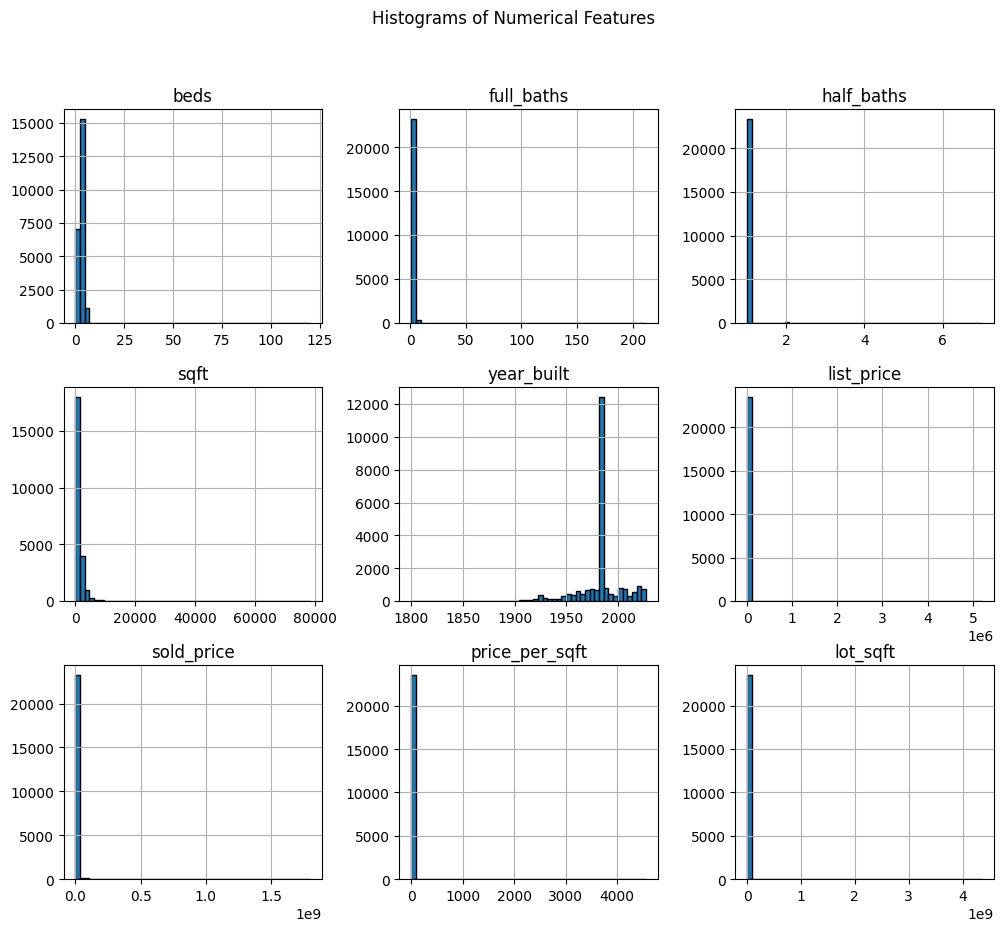

In [13]:
# Step 9: Visualize Distributions of Key Numerical Features
plt.figure(figsize=(12, 6))
df[numeric_cols].hist(figsize=(12, 10), bins=50, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


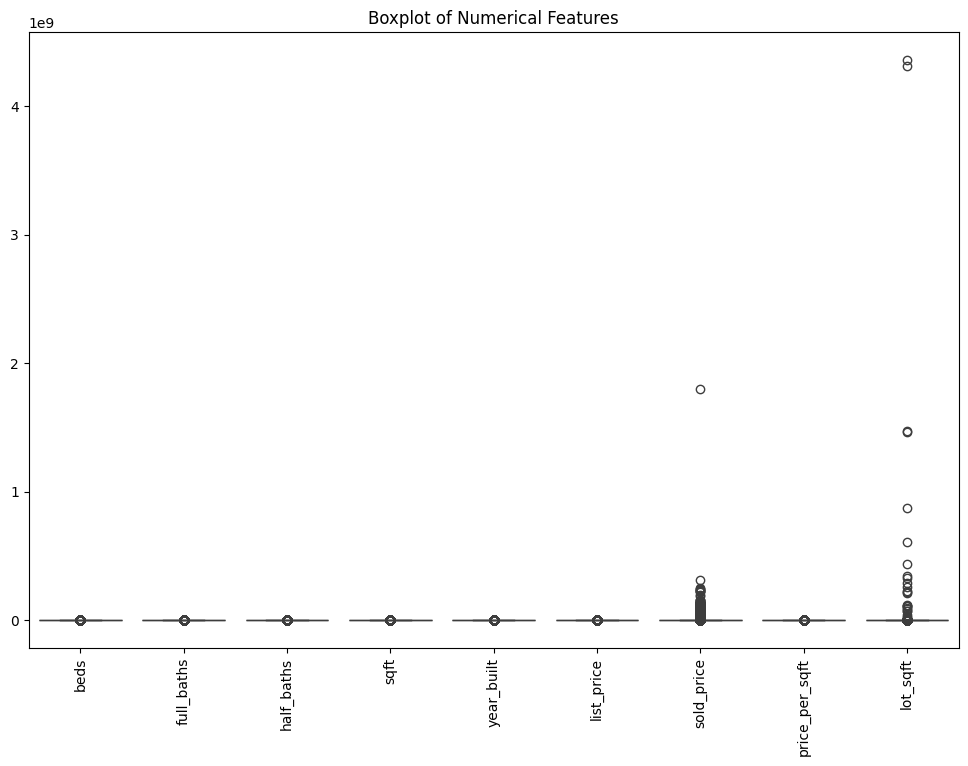

In [14]:
# Step 10: Boxplots to Identify Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()

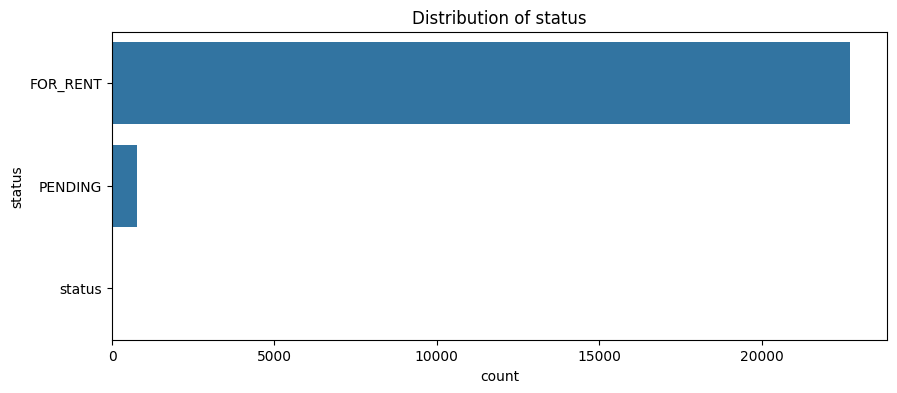

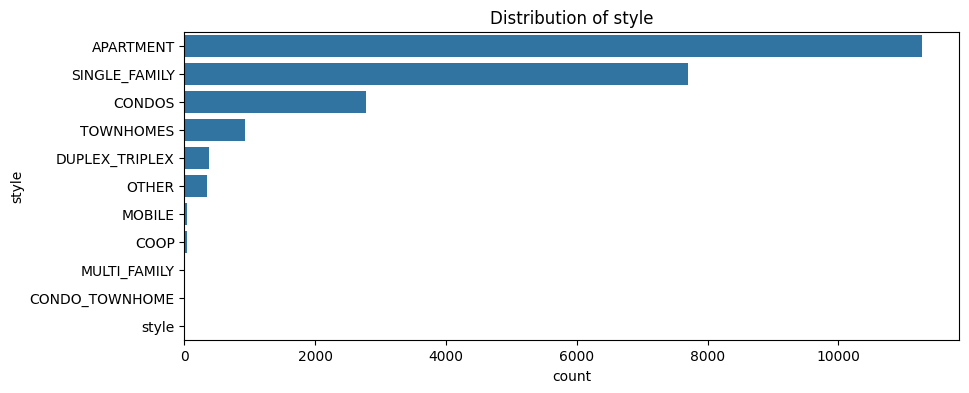

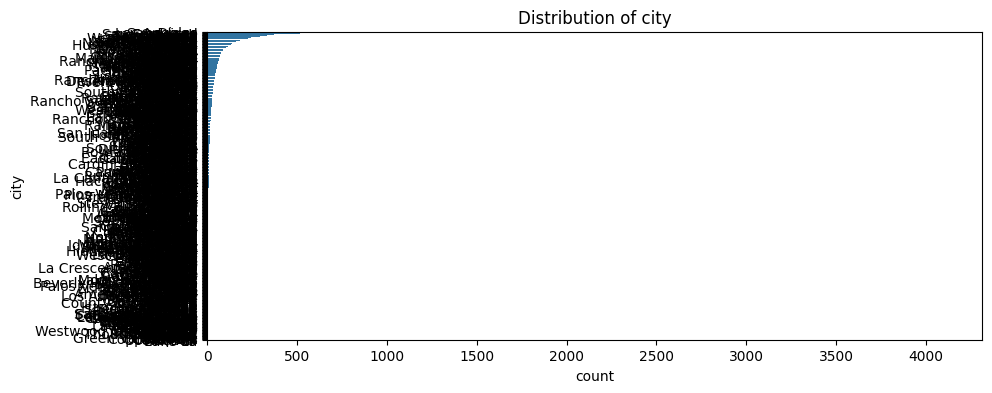

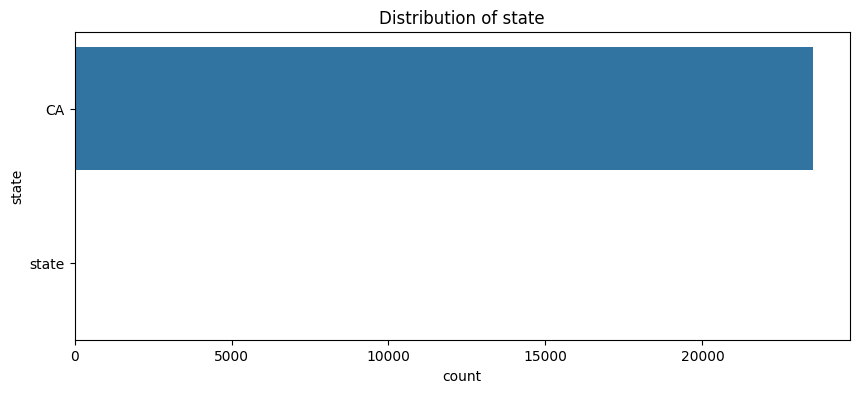

In [15]:
# Step 11: Analyze Categorical Feature Distributions
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

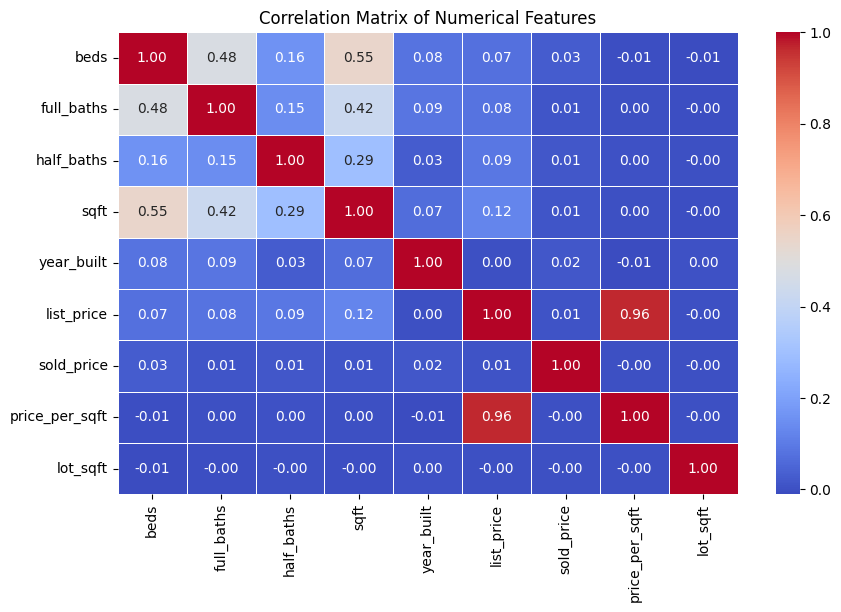

In [16]:
# Step 12: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [17]:
# Step : Drop Highly Missing Columns (More than 80% missing)
missing_threshold = 0.8  # 80% threshold
missing_ratio = df.isnull().sum() / len(df)

# Identify columns to drop
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns with more than 80% missing values.\n")


Dropped 3 columns with more than 80% missing values.



In [18]:
# Select key features for clustering
selected_features = ['beds', 'full_baths', 'sqft', 'year_built',
                     'list_price', 'sold_price', 'price_per_sqft',
                     'lot_sqft', 'latitude', 'longitude']

df_cleaned = df[selected_features]


In [19]:
# Step 5: Normalize Numerical Features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ensure 'latitude' and 'longitude' are numeric
df_cleaned['latitude'] = pd.to_numeric(df_cleaned['latitude'], errors='coerce')
df_cleaned['longitude'] = pd.to_numeric(df_cleaned['longitude'], errors='coerce')

# Now apply scaling
df_cleaned[selected_features] = scaler.fit_transform(df_cleaned[selected_features])

print("Data normalization completed.\n")

Data normalization completed.



<ipython-input-19-23162642b3ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['latitude'] = pd.to_numeric(df_cleaned['latitude'], errors='coerce')
<ipython-input-19-23162642b3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['longitude'] = pd.to_numeric(df_cleaned['longitude'], errors='coerce')
<ipython-input-19-23162642b3ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [20]:
print("Final Cleaned Dataset:")
print(df_cleaned.head())

Final Cleaned Dataset:
       beds  full_baths      sqft  year_built  list_price  sold_price  \
0  0.016667    0.004739  0.013060    0.814978    0.000864    0.000269   
1  0.025000    0.004739  0.016996    0.814978    0.000806    0.000431   
2  0.008333    0.000000  0.007195    0.762115    0.000864    0.000305   
3  0.016667    0.004739  0.019936    0.775330    0.000864    0.000448   
4  0.025000    0.004739  0.024281    0.814978    0.000960    0.000489   

   price_per_sqft  lot_sqft  latitude  longitude  
0        0.000877  0.000002  0.135009   0.798961  
1        0.000658  0.000002       NaN        NaN  
2        0.001535  0.000002  0.013792   0.731103  
3        0.000658  0.000010  0.069788   0.708958  
4        0.000658  0.000002  0.069551   0.710728  


In [21]:
df_cleaned.to_csv("cleaned_house_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_house_data.csv'.")

Cleaned dataset saved as 'cleaned_house_data.csv'.


<Figure size 1200x600 with 0 Axes>

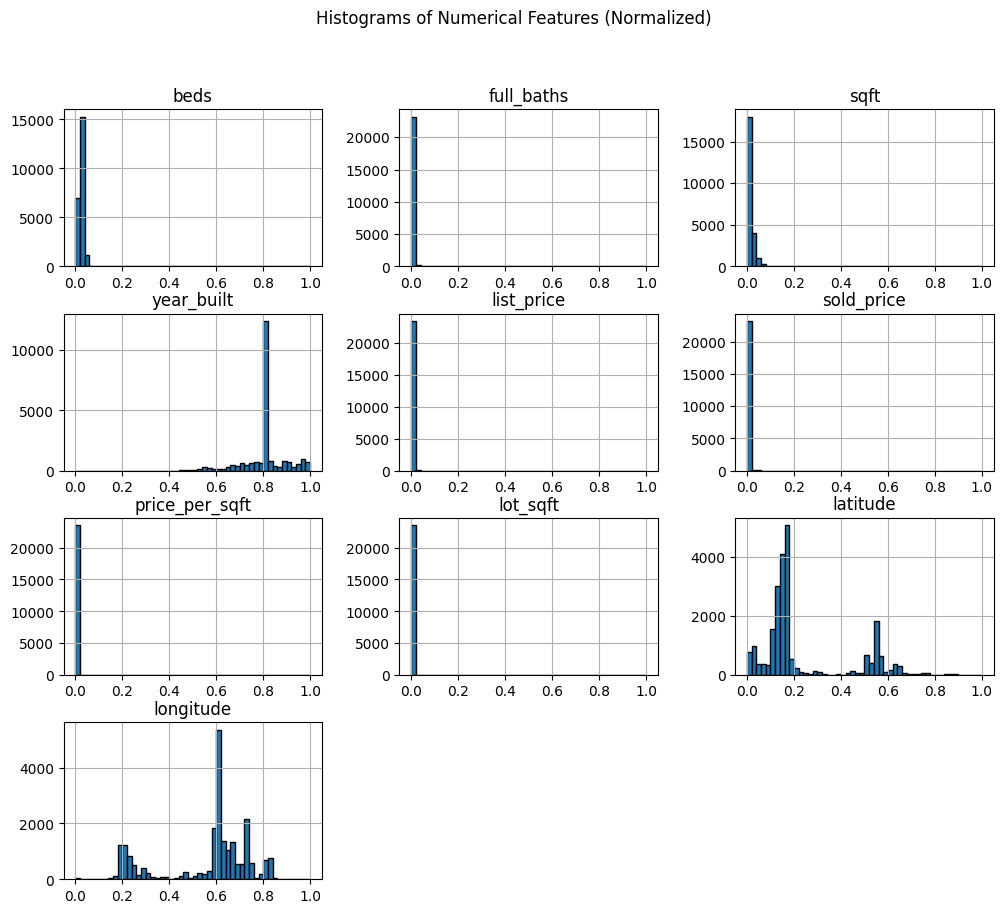

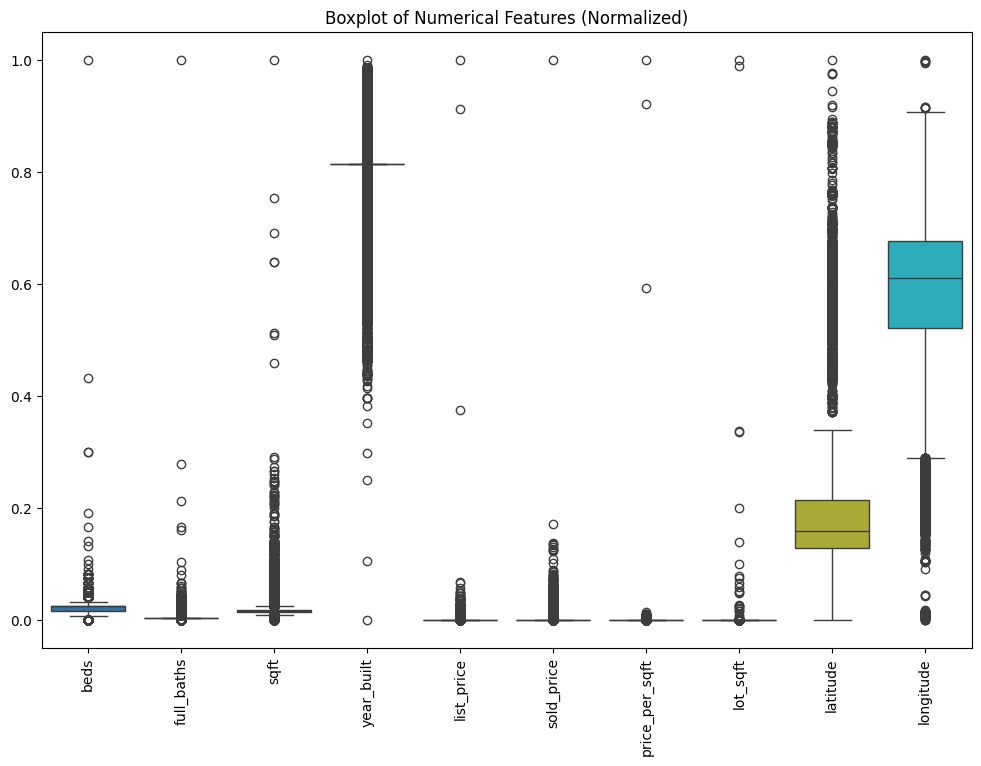

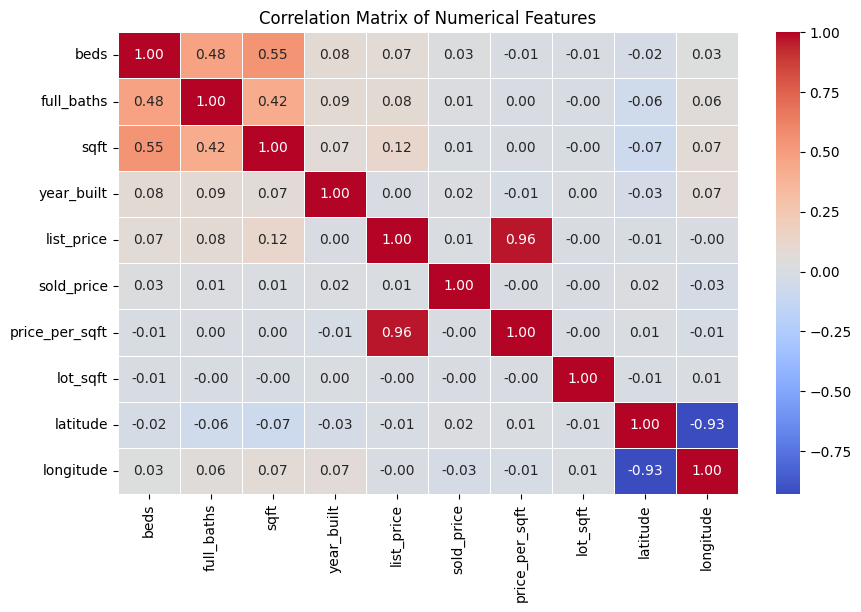

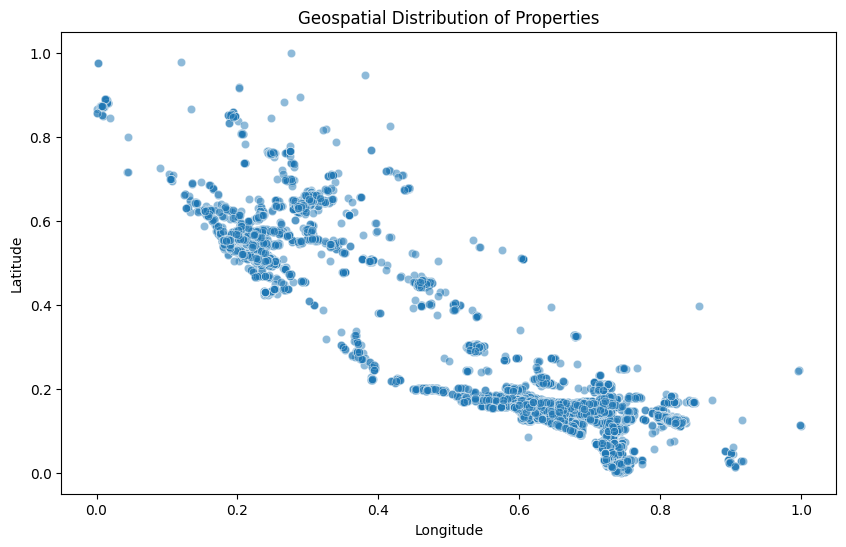

In [22]:
# Step 1: Load Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Cleaned Dataset
df_cleaned = pd.read_csv("cleaned_house_data.csv")

# Step 3: Histograms (Feature Distributions)
plt.figure(figsize=(12, 6))
df_cleaned.hist(figsize=(12, 10), bins=50, edgecolor='black')
plt.suptitle('Histograms of Numerical Features (Normalized)')
plt.show()

# Step 4: Boxplots (Outlier Detection)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features (Normalized)')
plt.show()

# Step 5: Correlation Matrix (Feature Relationships)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 6: Geospatial Scatter Plot (Property Distribution)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Properties')
plt.show()


In [23]:
!pip install kneed

In [29]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.impute import SimpleImputer

In [30]:
df_cleaned = pd.read_csv("cleaned_house_data.csv")

In [31]:
# Step 4: Select Features for Clustering (Adjust Based on Your Goal)
selected_features = ['beds', 'full_baths', 'sqft', 'year_built',
                     'list_price', 'sold_price', 'price_per_sqft',
                     'lot_sqft', 'latitude', 'longitude']

df_cluster = df_cleaned[selected_features]

In [32]:
# Step 5: Standardize Features for Better Clustering
scaler = StandardScaler()
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
df_imputed = imputer.fit_transform(df_cluster) # Impute missing values
df_scaled = scaler.fit_transform(df_imputed) # Standardize the imputed data


In [33]:
# Step 6: Find Optimal Number of Clusters Using the Elbow Method
sse = []
silhouette_scores = []

k_values = range(2, 11)  # Checking for clusters from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # SSE Calculation
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

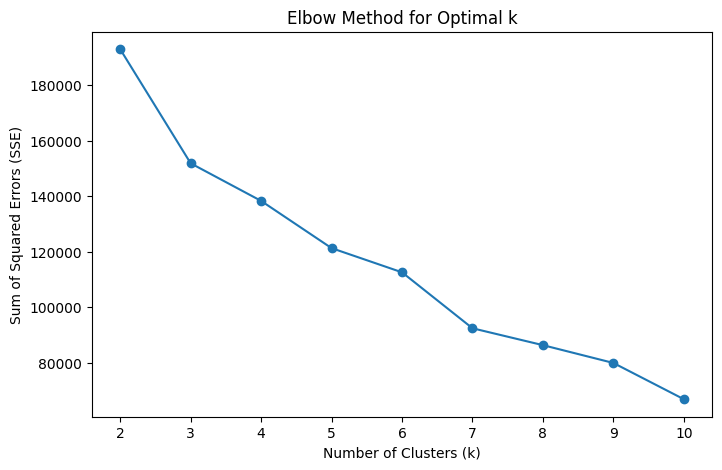

In [34]:
# Step 7: Plot SSE to Find the "Elbow Point"
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [35]:
# Step 8: Determine the Best k Using the KneeLocator
optimal_k = KneeLocator(k_values, sse, curve="convex", direction="decreasing").elbow
print(f"Optimal number of clusters determined by the elbow method: {optimal_k}")


Optimal number of clusters determined by the elbow method: 7


In [36]:
# Step 9: Apply K-Means with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned["Cluster"] = kmeans.fit_predict(df_scaled)

In [37]:

# Step 10: Compute the Final Silhouette Score
final_silhouette = silhouette_score(df_scaled, df_cleaned["Cluster"])
print(f"Final Silhouette Score: {final_silhouette:.4f}")

Final Silhouette Score: 0.3511


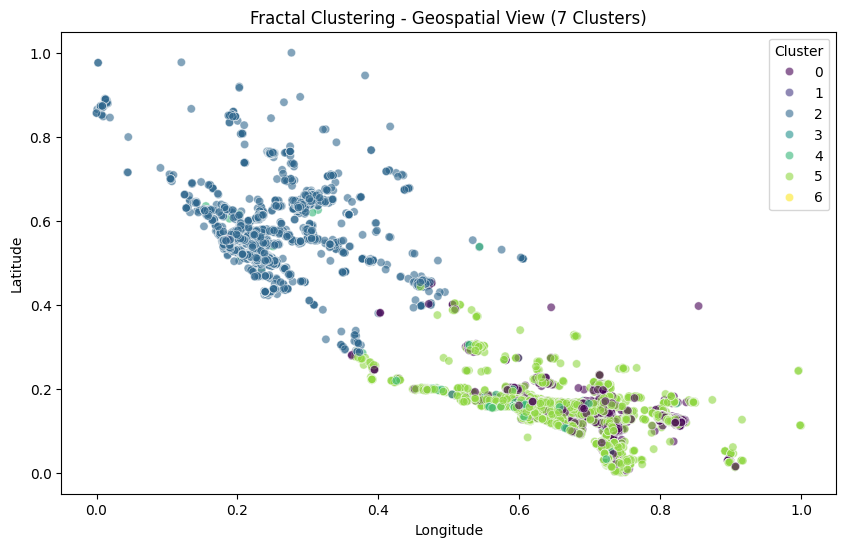

In [38]:
# Step 11: Visualize Clusters (2D Projection Using Latitude & Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], hue=df_cleaned['Cluster'], palette='viridis', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Fractal Clustering - Geospatial View ({optimal_k} Clusters)")
plt.legend(title="Cluster")
plt.show()

In [39]:
# Step 12: Save the Clustered Dataset
df_cleaned.to_csv("fractal_clustered_data.csv", index=False)
print("Fractal clustered dataset saved as 'fractal_clustered_data.csv'.")

Fractal clustered dataset saved as 'fractal_clustered_data.csv'.


In [40]:
# Step 1: Load the Clustered Dataset
df_clustered = pd.read_csv("fractal_clustered_data.csv")

In [41]:
# Function 1: Find Cluster with Highest Average Price
best_high_price_cluster = df_clustered.groupby("Cluster")["list_price"].mean().idxmax()
max_avg_price = df_clustered.groupby("Cluster")["list_price"].mean().max()

print(f"Golden Cluster (Highest Avg Price): Cluster {best_high_price_cluster} with Avg Price: ${max_avg_price:,.2f}")

Golden Cluster (Highest Avg Price): Cluster 1 with Avg Price: $0.76


In [42]:
# Function 2: Find Cluster with Lowest Price Variance
best_low_variance_cluster = df_clustered.groupby("Cluster")["list_price"].var().idxmin()
min_price_variance = df_clustered.groupby("Cluster")["list_price"].var().min()

print(f"Golden Cluster (Lowest Price Variance): Cluster {best_low_variance_cluster} with Variance: ${min_price_variance:,.2f}")

Golden Cluster (Lowest Price Variance): Cluster 3 with Variance: $0.00


<ipython-input-43-140e851f1a3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.mean, palette="viridis")


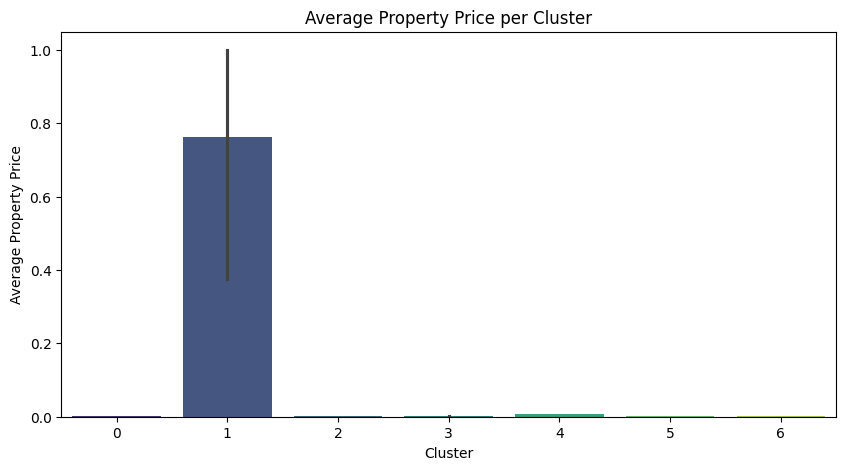

<ipython-input-43-140e851f1a3d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.var, palette="coolwarm")


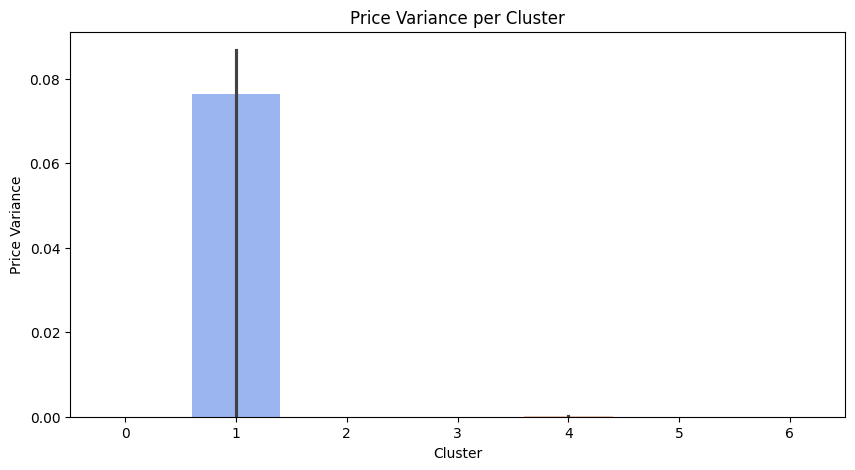

In [43]:
# Step 3: Visualize Clusters Based on Pricing

plt.figure(figsize=(10, 5))
sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.mean, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Property Price")
plt.title("Average Property Price per Cluster")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.var, palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Price Variance")
plt.title("Price Variance per Cluster")
plt.show()

<ipython-input-45-9f622dd67201>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clustered["Cluster"], palette="viridis")


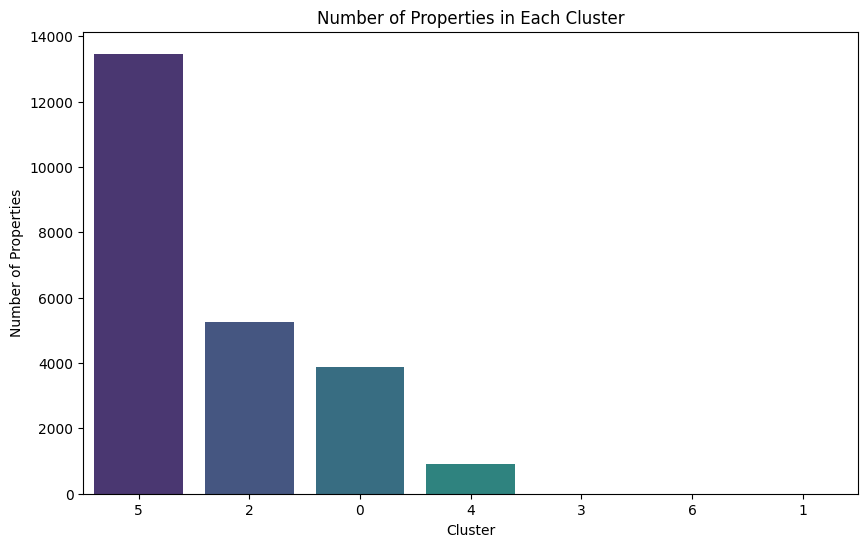

<ipython-input-45-9f622dd67201>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], palette="coolwarm")


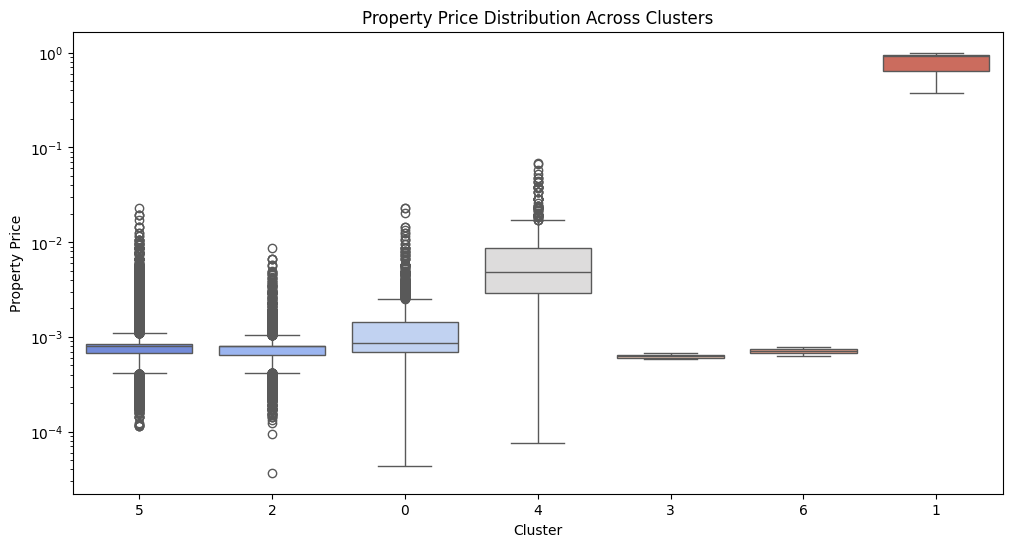

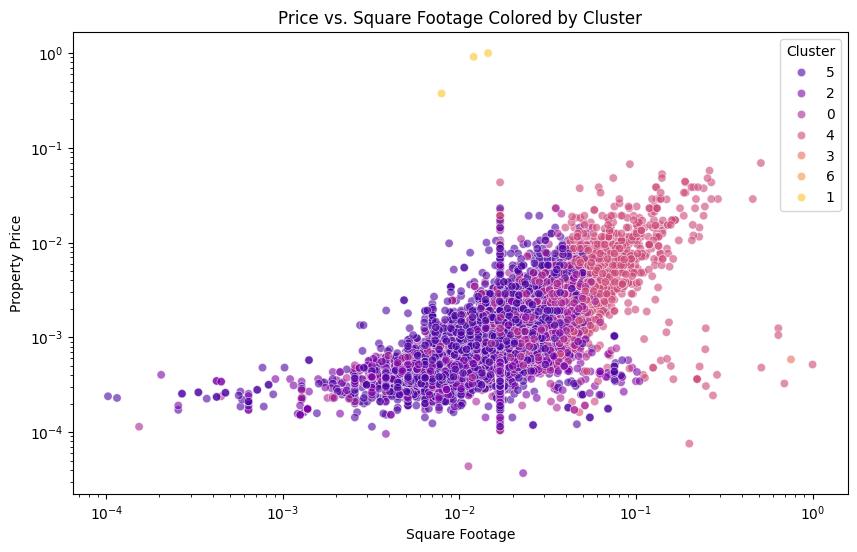

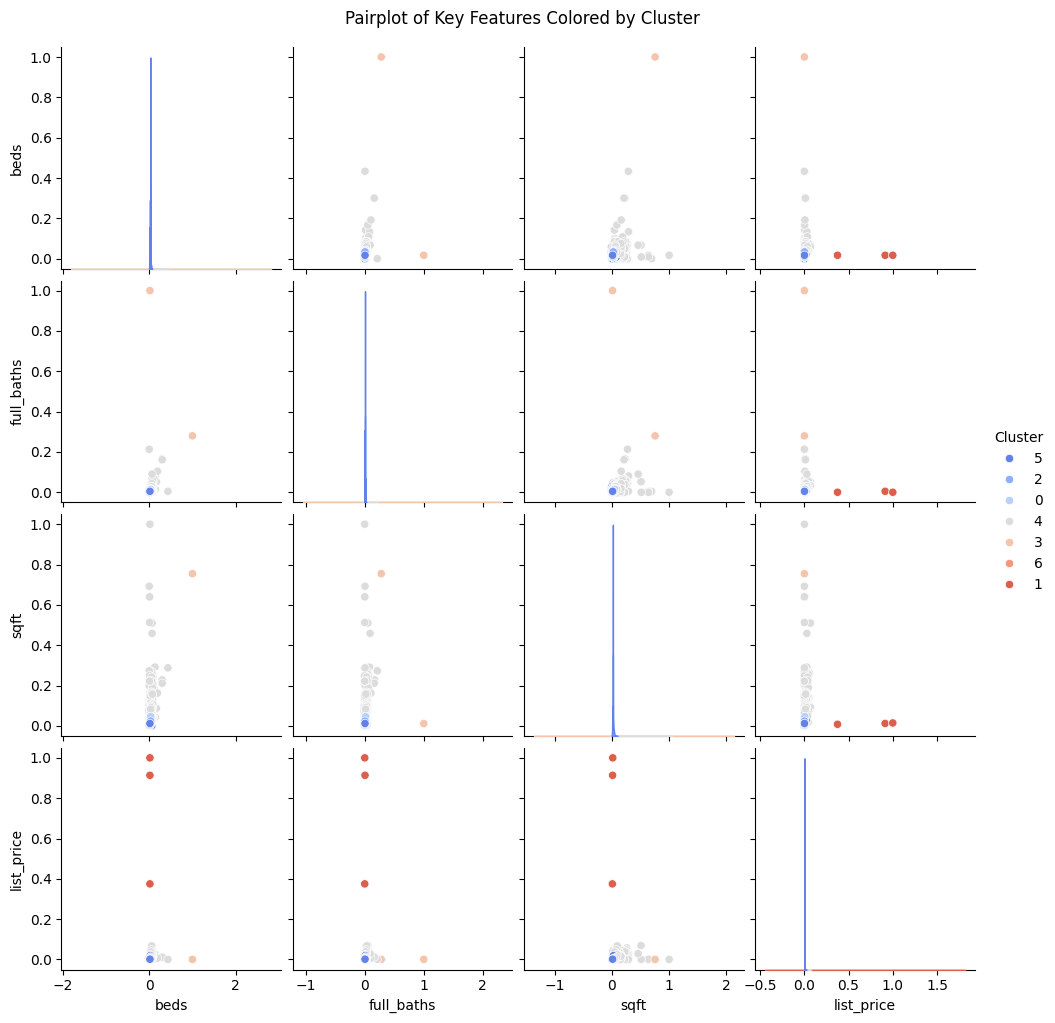

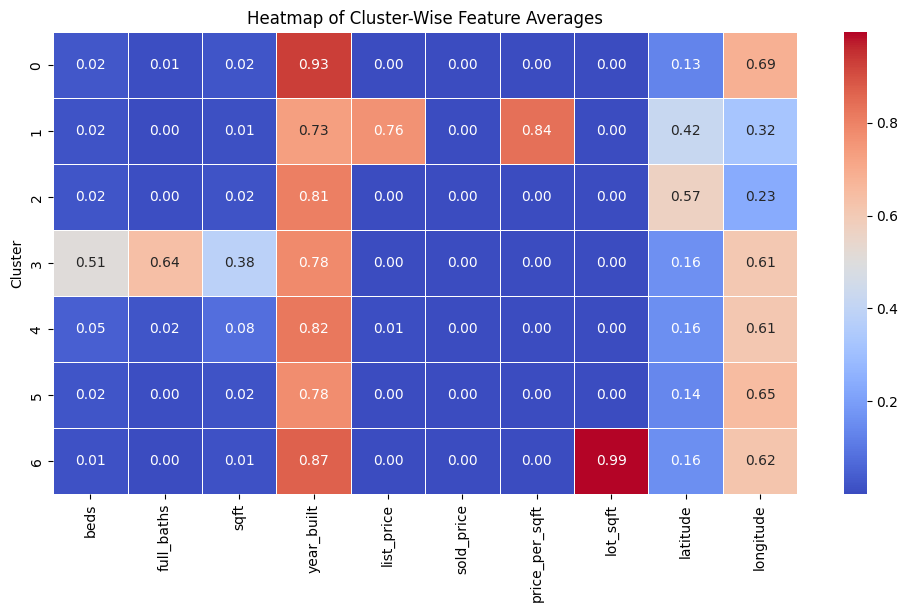

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Reload the dataset
file_path = "/content/fractal_clustered_data.csv"
df_clustered = pd.read_csv(file_path)

# Ensure Cluster is treated as categorical
df_clustered["Cluster"] = df_clustered["Cluster"].astype(str)

# Step 1: Visualize Cluster Distributions
plt.figure(figsize=(10, 6))
sns.countplot(x=df_clustered["Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Properties")
plt.title("Number of Properties in Each Cluster")
plt.show()

# Step 2: Boxplot of Prices Across Clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Property Price")
plt.title("Property Price Distribution Across Clusters")
plt.yscale("log")  # Log scale for better visualization of price ranges
plt.show()

# Step 3: Scatter Plot of Price vs. Square Footage Colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustered["sqft"], y=df_clustered["list_price"], hue=df_clustered["Cluster"], palette="plasma", alpha=0.6)
plt.xlabel("Square Footage")
plt.ylabel("Property Price")
plt.title("Price vs. Square Footage Colored by Cluster")
plt.xscale("log")  # Log scale for better distribution
plt.yscale("log")
plt.show()

# Step 4: Pairplot for Feature Relationships
sns.pairplot(df_clustered, vars=['beds', 'full_baths', 'sqft', 'list_price'], hue="Cluster", palette="coolwarm")
plt.suptitle("Pairplot of Key Features Colored by Cluster", y=1.02)
plt.show()

# Step 5: Heatmap Showing Cluster-Wise Feature Averages
plt.figure(figsize=(12, 6))
sns.heatmap(df_clustered.groupby("Cluster").mean(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Cluster-Wise Feature Averages")
plt.show()


In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Handle Missing Values
df_clustered_features = df_clustered[['beds', 'full_baths', 'sqft', 'year_built',
                                      'list_price', 'sold_price', 'price_per_sqft',
                                      'lot_sqft', 'latitude', 'longitude']]

# Fill missing values with the median of each column
df_clustered_features.fillna(df_clustered_features.median(), inplace=True)

<ipython-input-46-c15a7598d747>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered_features.fillna(df_clustered_features.median(), inplace=True)


In [47]:
# Step 2: Compute SSE (Sum of Squared Errors)
optimal_k = df_clustered["Cluster"].nunique()  # Get the number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_clustered_features)

sse = kmeans.inertia_  # SSE Calculation
print(f"Sum of Squared Errors (SSE) for {optimal_k} clusters: {sse:.2f}")

Sum of Squared Errors (SSE) for 7 clusters: 170.29


In [48]:
# Step 3: Compute Silhouette Score
silhouette_avg = silhouette_score(df_clustered_features, df_clustered["Cluster"].astype(int))
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")


Silhouette Score for 7 clusters: 0.3612
